In [1]:
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
import pandas as pd
import numpy as np
from IPython.display import Image, display

In [2]:
ta_q = gpd.read_file("./csv_tables/TA_Quaters_UTM/Quarters.shp")
ta_q.oidrova = pd.to_numeric(ta_q.oidrova, downcast='integer')
ta_q.krova = pd.to_numeric(ta_q.krova, downcast='integer')
display(ta_q.crs)
ta_q

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

,oidrova,krova,dateimport,ShapeArea,geometry
0,1,1,01/12/2015 02:28:14,1.301654e+07,"POLYGON ((670795.655 3555762.452, 670797.577 3..."
1,2,2,01/12/2015 02:28:14,8.013404e+06,"POLYGON ((672021.029 3553364.492, 672014.690 3..."
2,3,3,01/12/2015 02:28:14,3.380430e+06,"POLYGON ((668311.070 3552547.701, 668311.229 3..."
3,4,4,01/12/2015 02:28:14,4.510255e+06,"POLYGON ((670771.828 3552544.564, 670771.584 3..."
4,5,6,01/12/2015 02:28:14,2.089044e+06,"POLYGON ((668160.048 3550196.192, 668162.425 3..."
5,6,9,01/12/2015 02:28:14,7.879856e+06,"POLYGON ((668811.121 3546980.368, 668808.698 3..."
6,7,5,01/12/2015 02:28:14,3.024297e+06,"POLYGON ((666698.783 3550619.396, 666701.339 3..."
7,8,8,01/12/2015 02:28:14,3.420996e+06,"POLYGON ((667954.133 3548820.374, 667956.725 3..."
8,9,7,01/12/2015 02:28:14,6.343551e+06,"POLYGON ((665854.540 3548193.053, 665868.137 3..."


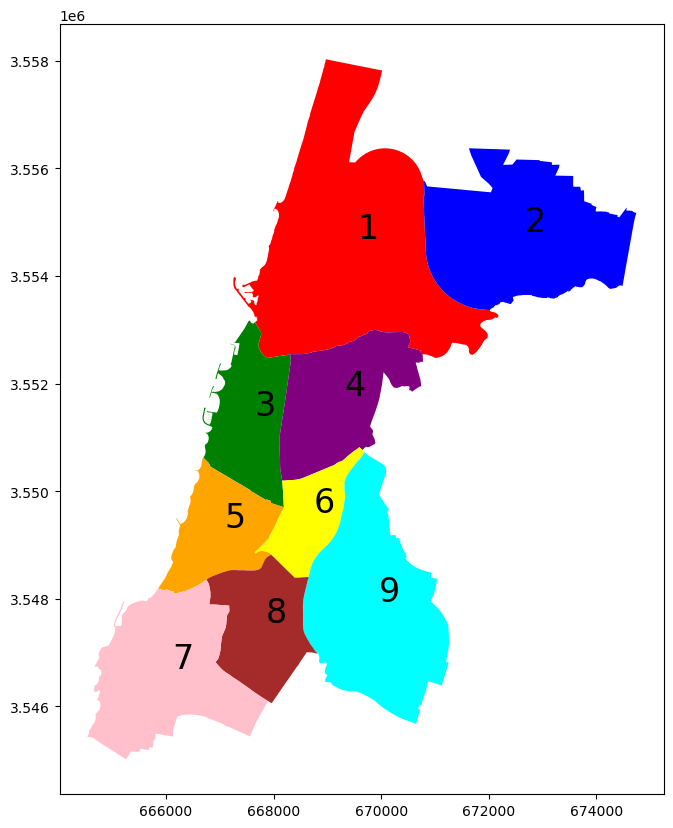

In [3]:
ta_q['index'] = ta_q.index

# Define a list of colors
color_map = {
    1: 'red', 2: 'blue', 3: 'green', 4: 'purple',
    5: 'orange', 6: 'yellow', 7: 'pink', 8: 'brown', 9: 'cyan'
}

# Basic plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Plot each shape with a different color from the list
for idx, row in ta_q.iterrows():
    color = color_map[row['krova']]  # Cycle through the colors list
    gpd.GeoSeries([row['geometry']]).plot(ax=ax, color=color)

    # Get the centroid of the polygon to place the text
    centroid = row['geometry'].centroid
    ax.annotate(text=row['krova'], xy=(centroid.x, centroid.y), 
                xytext=(3, 3), textcoords="offset points",
                fontsize=24, color='black')

plt.show()

In [4]:
# Exclude micro mobility
BICYCLE = 15
SCOOTER = 21
E_BICYCLE = 23
micro_m = [SCOOTER, E_BICYCLE, BICYCLE]


In [5]:
# Load original accident data
i_m_h_ta_gdf = gpd.read_parquet('./csv_tables/i_m_h_ta_gdf.parquet')

In [6]:
# Accidents that are not MM
i_m_h_ta_no_mm_gdf = i_m_h_ta_gdf[~(i_m_h_ta_gdf.involve_vehicle_type.isin(micro_m))].copy()

In [7]:
# Accidents that are just MM
i_m_h_ta_mm_gdf =  gpd.read_parquet('./csv_tables/i_m_h_ta_mm_gdf.parquet')
display(i_m_h_ta_mm_gdf.crs)
i_m_h_ta_mm_gdf.head(5)

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

,accident_id,provider_and_id,provider_code,file_type_police,involved_type,involved_type_hebrew,license_acquiring_date,age_group,age_group_hebrew,sex,...,vehicle_attribution,vehicle_attribution_hebrew,seats,total_weight,total_weight_hebrew,vehicle_damage,vehicle_damage_hebrew,urban_intersection,accident_date,geometry
41,2013001368,32013001368,3,3,2,נהג נפגע,0,6,25-29,1,...,1.0,ישראלי,99.0,0.0,לא ידוע,4.0,אין נזק,NaN,2013-07-27 01:00:00,POINT (667544.749 3549959.961)
50,2013001742,32013001742,3,3,2,נהג נפגע,0,7,30-34,2,...,1.0,ישראלי,99.0,0.0,לא ידוע,4.0,אין נזק,NaN,2013-10-07 01:30:00,POINT (667286.918 3548726.540)
131,2013001350,12013001350,1,1,2,נהג נפגע,0,5,20-24,1,...,1.0,ישראלי,99.0,0.0,לא ידוע,4.0,אין נזק,NaN,2013-08-25 01:00:00,POINT (667023.688 3548785.170)
196,2013000147,12013000147,1,1,2,נהג נפגע,0,8,35-39,1,...,1.0,ישראלי,99.0,0.0,לא ידוע,2.0,בינוני,9110323.0,2013-09-19 00:00:00,POINT (668158.751 3551284.678)
197,2013000147,12013000147,1,1,2,נהג נפגע,0,6,25-29,1,...,1.0,ישראלי,99.0,0.0,לא ידוע,2.0,בינוני,9110323.0,2013-09-19 00:00:00,POINT (668158.751 3551284.678)


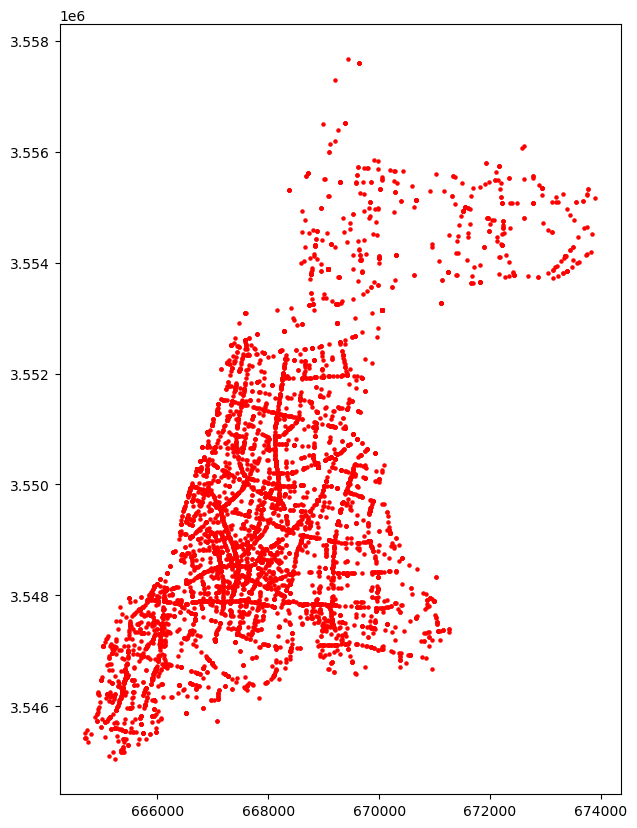

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
i_m_h_ta_mm_gdf.plot(ax=ax, color='red', marker='o', markersize=5 )
plt.show()

In [9]:
bp_ta_bp_and_meta = gpd.read_parquet('./csv_tables/bp_ta_bp_and_meta.parquet')
bp_ta_bp_and_meta.head(5)

,oid_shvil,msorech,dateimport,create_year,shemmikta,create_date,geometry,width,direction,bitzua,miflas,date_created
0,1,95.10,14/08/2024 02:30:05,2012,נמיר מיוניצ'מן דרומה,None,"LINESTRING (669823.985 3557373.860, 669855.549...",2.5,דו סטרי,2012,None,None
1,2,201.14,14/08/2024 02:30:05,2013,פרופס מנמיר עד קדושי השואה,None,"LINESTRING (669232.834 3555478.027, 669169.381...",2.5,דו סטרי,2013,None,None
2,3,696.31,14/08/2024 02:30:05,2004,יאיר רוזנבלום מאורי צבי גרינברג עד פרופס,None,"LINESTRING (669232.637 3555478.023, 669249.025...",2.1,דו סטרי,2004,None,None
3,4,659.20,14/08/2024 02:30:05,2018,"קק""ל מנמיר עד חיים לבנון",None,"LINESTRING (669354.261 3555417.055, 669410.178...",2.5,דו סטרי,2018,מדרכה,None
4,5,362.67,14/08/2024 02:30:05,2018,רקנאטי בגינה מקרן קיימת לישראל עד אחימאיר,None,"LINESTRING (669946.350 3555344.516, 669962.261...",2.0,דו סטרי,2018,None,30/06/2018


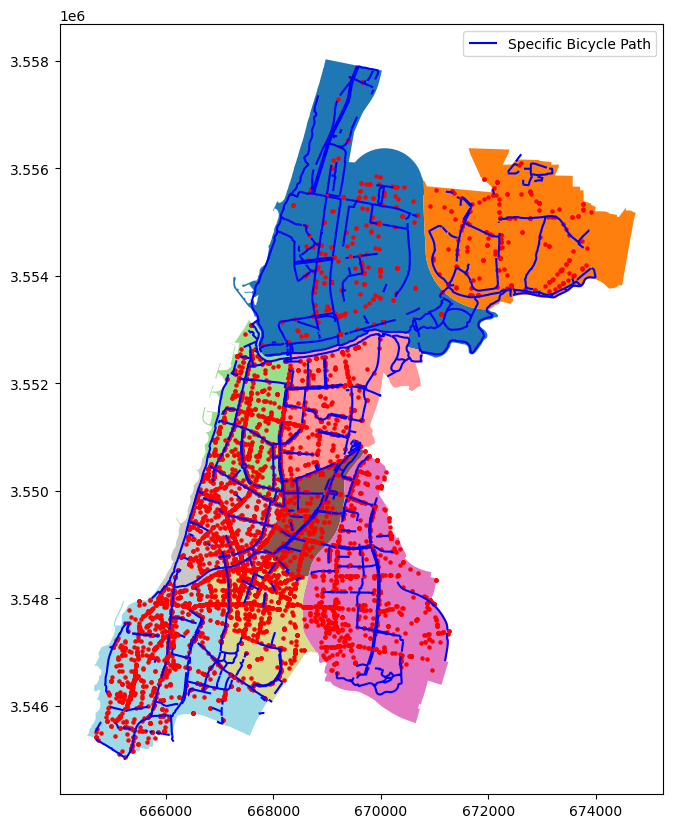

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))

ta_q.plot(ax=ax, cmap='tab20', legend=True,)
bp_ta_bp_and_meta.plot(ax=ax, color='blue', label='Specific Bicycle Path')
i_m_h_ta_mm_gdf.plot(ax=ax, color='red', marker='o', markersize=5 )

plt.legend()
plt.show()

In [11]:
ta_streets = gpd.read_file('./csv_tables/TA_streets_20240724_031704/Streets.shp')
ta_streets

,oidrechov,krechov,trechov,shemangli,mslamas,tsug,kkivun,UniqueId,shemarvit,kreka,geometry
0,1.0,915.0,הרוגי מלכות,HARUGEY MALKHOT,336.0,רחוב,0.0,507-10001,قتل مملكة,100.0,"LINESTRING (672865.880 3554095.253, 672895.216..."
1,2.0,0.0,0,UKNOWN,0.0,רחוב,3.0,507-10002,None,100.0,"LINESTRING (666990.498 3551436.940, 667065.337..."
2,3.0,265.0,אמסטרדם,AMSTERDAM,516.0,רחוב,1.0,507-10003,أمستردام,100.0,"LINESTRING (667879.712 3551424.162, 667940.741..."
3,4.0,644.0,אלון יגאל,YIG'AL ALLON,2524.0,רחוב,0.0,507-10004,ألون ييغال,200.0,"LINESTRING (669570.036 3550420.535, 669581.404..."
4,5.0,634.0,מרגולין,MARGOLIN,2649.0,רחוב,1.0,507-10005,مارغولين,100.0,"LINESTRING (669329.153 3548322.758, 669409.403..."
...,...,...,...,...,...,...,...,...,...,...,...
8874,9851.0,3007.0,שבטי ישראל,SHIVTEY YISRA'EL,1983.0,רחוב,0.0,507-17843,قبائل إسرائيل,100.0,"LINESTRING (665771.816 3547023.159, 665760.256..."
8875,9852.0,3058.0,אבינרי יצחק,AVINERY,2027.0,רחוב,0.0,507-20562,Avinri Yitzhak,100.0,"LINESTRING (665585.719 3547178.152, 665627.936..."
8876,9853.0,3058.0,אבינרי יצחק,AVINERY,2027.0,רחוב,0.0,507-20563,Avinri Yitzhak,100.0,"LINESTRING (665700.142 3547064.296, 665759.119..."
8877,9855.0,3907.0,3907,None,1703.0,רחוב,0.0,507-21960,3907,100.0,"LINESTRING (665087.059 3546677.092, 665075.120..."


#### Checking streets

In [50]:
# checking street names:
# אב exists in i_m_h_ta_gdf and ta_streets
# i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == 'אב'].street1_hebrew
# ta_streets[ta_streets.trechov == 'אב']

# אביגור שאול  can't find it, need to check in map. it's אביגור in ta_streets
# i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == 'אביגור שאול'].street1_hebrew
# ta_streets[ta_streets.trechov == 'שאול אביגור ']

# אבן ג'אנח is אבן גבירול

# street named 'ו doesn't exists on google maps so this needs to be dropped from ta_streets
# i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "'ו"].street1_hebrew
# ta_streets[ta_streets.trechov == "ו'"]

# street named: 'ל"א' no such street on google maps correlates to harav yossef tzoberi and part of another street ben sira yaakov
ta_streets[ta_streets.trechov == 'ל"א']
ta_streets[ta_streets.trechov == 'בן-סירה יעקב']
# correct oidrechov of ben-sira yaakov: [6270.0, 6303.0, 6621.0, 6622.0]	

# ta_streets[ta_streets.trechov == 'צוברי יוסף הרב']
# correct oidrechov of tzoberi: [6495.0, 9059.0, 9060.0, 6260.0, 6261.0, 9063.0, 9064.0]  

# street named in ta_streets אוריאל אקוסטה in google uriel da costa, in i_m_h_ta אורי
# אורי relates to לסר אורי
ta_streets[ta_streets.trechov == 'אוריאל אקוסטה']
# no accidents on אוריאל דה קוסטה

# street name it i_m_h_ta אלביטר עבדאלראוף, can't find similar name in ta_streets or google maps
i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "אלביטר עבדאלראוף"]

# checking גני יהושע no correlation in ta_streets
i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "גני צהלה"]
# so this is a park and has no street correlating to it

# גני צהלה same as גני יהושע these 2 places have 

# דרך אליאב לובה in i_m_h_ta_gpd, in google it's דרך לובה אריה אליאב, it's an underground road with 5 accidents
# checking המצודה in i_m_h_ta_gpd, seems like it not a real street

i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "המצודה"] 
# google maps shows it's in a building area, maybe the accident happened underground.

# המשתלה, seems to be a park, 5 accidents
i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "המשתלה"]

# checking הס משה, should be הס
i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "הס משה"]

# checking הערבה, no street in ta_streets
i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "הערבה"]
# accident seems to be in a building area, maybe underground

# checking הקישון, no correlated street in ta_streets, there is a street in google maps.
i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "הקישון"]
# in ta_streets, הקישון correlates to אפרים קישון but the string line goes in to neighboring streets.

# הקריה general building area and not a street

# checking הרצוג In ta_street and הרב חיים הרצוג. there is not הרצוג in google maps, but there is שדרת חיים הרצוג 
# i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "הרצוג"]

# checking in i_m_h_ta_gpd ויקי שירן corresponds to שירן ויקי ד"ר doesn't show in google maps in any variation
i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "ויקי שירן"]
# ויקי שירן in i_m_h_ta_gpd is the same place as הערבה, there is also no שירן ויקי ד"ר street in google maps. they will be dropped
# שירן ויקי ד"ר is used as part of הסוללים in google maps, but in apple maps it the same
# ד"ר דליה רביקובי'ץ is 1334 in google maps

# checking חנניה in i_m_h_ta_gpd can't find a correlating street in ta_streets
i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "חנניה"]
# it ta_streets חנניה is missing

# checking יואל הנביא  in i_m_h_ta_gpd, is the same as יואל
i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "יואל הנביא"]

# checking לאה גולדברג, there's a street in ta_streets called גולדברג and in i_m_h_ta_gpd but there
i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "גולדברג"]
# גולדברג exists in google maps, but there is no לאה גולדברג in i_m_h_ta_gpd. לאה גולדברג and לאה are the same

# checking יוסף לוי in i_m_h_ta_gpd,  maybe לוי יוסף גונדר in ta_streets
# it's the same

# checking מוסינזון in i_m_h_ta_gpd 
i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew.str.contains('מוסינזון', na=False)].street1_hebrew
# Now checking יגאל מוסינזון which doesn't exists in i_m_h_ta_gpd. after checking, there are no accidents on יגאל מוסינזון
# Now checking מוסנזון בן-ציון דר' that exists in ta_streets, is the same as מוסינזון in ta_streets

# checking בר-כוכבא משה (בריל). it's a weird street that is disjointed in it's parts. in google it's called משה בריל

# checking משעול יעקב from i_m_h_ta_gpd, in ta_streets there is no such street, but there is יעקב

 #checking סטימצקי, it correspond in ta_streets to סטימצקי אביגדור but google maps doesn't show it
 # סטימצקי אביגדור doesn't show properly in google but it does show it another map I have here.

 # checking סמ איתן from i_m_h_ta_gpd, correpsonds to איתן in ta_streets.csv

 # All street with סמ = סמטת and the line string is connected to the main street..kinda stupid by הלמ"ס

 # checking פין from i_m_h_ta_gpd, it's actually פיין

 # checking קהילת קיוב in i_m_h_ta_gpd, it's suppose to be קהילת קייב

 # checking רח 1062




12793     מוסינזון
12794     מוסינזון
103359    מוסינזון
103400    מוסינזון
Name: street1_hebrew, dtype: object

Checking accidents intersection with street

In [79]:
street = ta_streets[ta_streets.trechov == "מוסנזון בן-ציון דר'"].copy()
ta_streets_buffed = ta_streets.copy()
ta_streets_buffed['geometry'] = ta_streets_buffed.geometry.buffer(10)


# Buffer the LineString to create a Polygon
# Adjust the buffer distance as needed (e.g., 10 meters)
street_buffer = street.geometry.buffer(10)

# Create a GeoDataFrame from the buffered geometry
street_polygon = gpd.GeoDataFrame(street, geometry=street_buffer)

# # Ensure both GeoDataFrames have the same CRS
# i_m_h_ta_gdf = i_m_h_ta_gdf.to_crs(street_polygon.crs)

# Perform intersection to find accidents on the street
accidents_on_street = gpd.sjoin(ta_streets_buffed, i_m_h_ta_gdf[i_m_h_ta_gdf.street2_hebrew == "רח 1062"]
, how='inner', op='intersects')

# accidents_on_street = gpd.sjoin(ta_streets_buffed, i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "פין"]
# , how='inner', op='intersects')

# accidents_on_street = gpd.sjoin(i_m_h_ta_gdf, street_polygon,  how='inner', op='intersects')

# Display the results
# accidents_on_street.geometry = accidents_on_street.geometry.buffer(10)
accidents_on_street

,oidrechov,krechov,trechov,shemangli,mslamas,tsug,kkivun,UniqueId,shemarvit,kreka,...,vehicle_status_hebrew,vehicle_attribution,vehicle_attribution_hebrew,seats,total_weight,total_weight_hebrew,vehicle_damage,vehicle_damage_hebrew,urban_intersection,accident_date
4121,4198.0,1062.0,יעוד ודרך,None,4033.0,רחוב,0.0,507-14906,المناطق والطريقة,100.0,...,None,1.0,ישראלי,3.0,1.0,עד 1.9,4.0,אין נזק,80150905.0,2016-05-10 00:00:00
4121,4198.0,1062.0,יעוד ודרך,None,4033.0,רחוב,0.0,507-14906,المناطق والطريقة,100.0,...,None,NaN,None,NaN,NaN,None,NaN,None,80150905.0,2016-05-10 00:00:00


In [59]:
accidents_on_street.location_accuracy

107851    1
107851    1
107851    1
107851    1
107965    1
107965    1
107965    1
107965    1
Name: location_accuracy, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


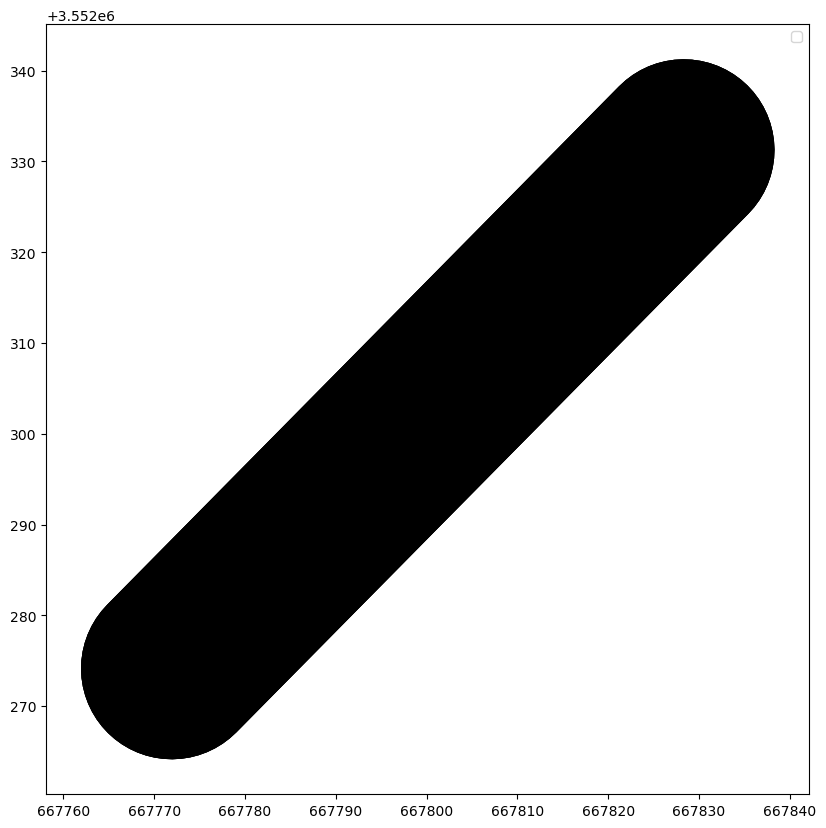

In [26]:
fig, ax = plt.subplots(figsize=(10, 10))
accidents_on_street.plot(ax=ax, color='black',linewidth=20)
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


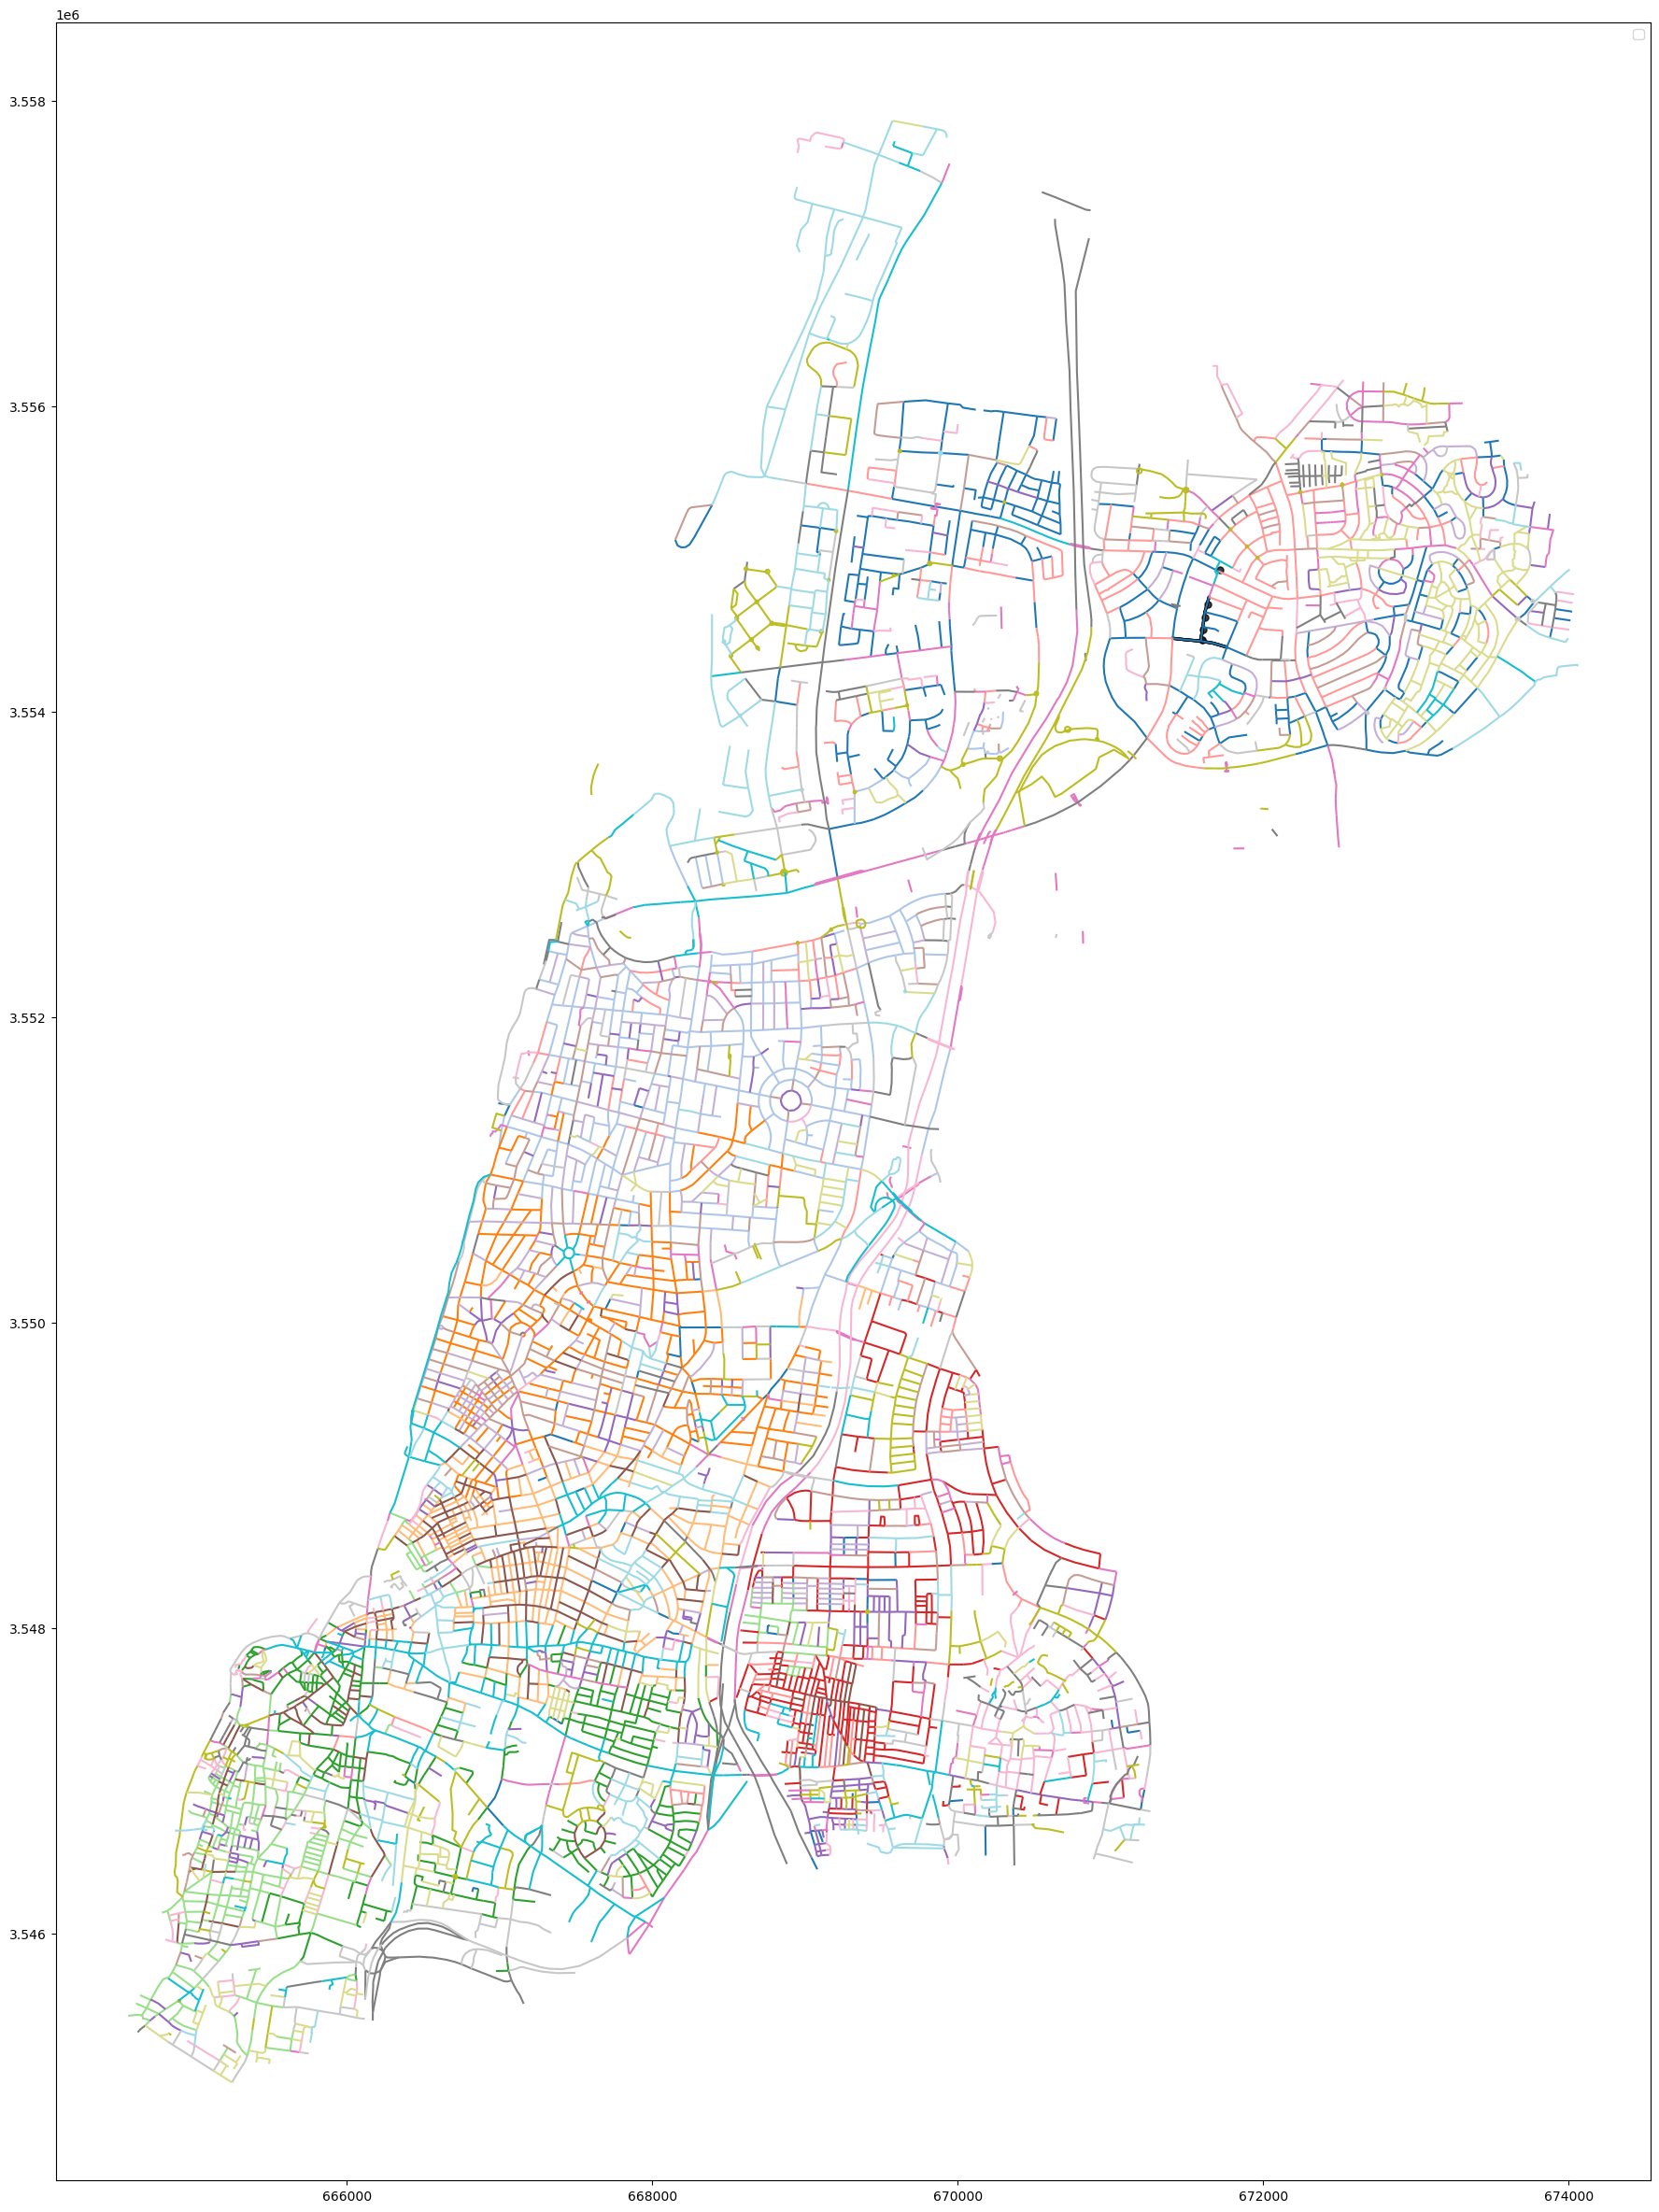

In [69]:

fig, ax = plt.subplots(figsize=(30, 30))
# i_m_h_ta_gdf.plot(ax=ax, color='red', marker='o', markersize=5 )
i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "קהילת קיוב"].plot(ax=ax, color='black', marker='o', markersize=25, alpha=0.5 )


ta_streets.plot(ax=ax, cmap='tab20')

accidents_on_street.plot(ax=ax, color='black', label='Specific Bicycle Path', linewidth=5)
# ta_streets[ta_streets.trechov == "מוסנזון בן-ציון דר'"].plot(ax=ax, color='black',linewidth=5)
# ta_streets[ta_streets.trechov == "סטימצקי אביגדור"].plot(ax=ax, color='black',linewidth=5)

# ta_q.plot(ax=ax, cmap='tab20', legend=True,)
# bp_ta_bp_and_meta.plot(ax=ax, color='blue', label='Specific Bicycle Path')
# accidents_on_street.plot(ax=ax, color='black', marker='o', markersize=15 )
# i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "אורי"].plot(ax=ax, color='black', marker='o', markersize=15 )


plt.legend()
plt.show()

In [15]:
import geopandas as gpd
from bokeh.io import output_file, show
from bokeh.models import HoverTool
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource
import json

# Load your data
# ta_streets = gpd.read_parquet('your_data.parquet')

# Convert GeoDataFrame to GeoJSON
geojson_data = json.loads(ta_streets.to_json())

# Create GeoJSONDataSource
geo_source = GeoJSONDataSource(geojson=json.dumps(geojson_data))

# Create a figure
p = figure(title="Interactive Map with Bokeh", tools="pan,wheel_zoom,reset", active_scroll='wheel_zoom')

# Add a hover tool
hover = HoverTool()
hover.tooltips = [("Street Name", "@trechov")]
p.add_tools(hover)

# Add the streets to the map
p.patches('xs', 'ys', source=geo_source, fill_color='blue', line_color='black', fill_alpha=0.7)

# Output to an HTML file and show
output_file("interactive_map.html")
show(p)


Almost works

---

Trying leafmap

In [16]:
# pip install leafmap

#### Showing street on map with names

In [80]:
import leafmap
import geopandas as gpd

# Load your data
# ta_streets = gpd.read_parquet('your_data.parquet')

# Create a map
m = leafmap.Map(center=(35.0, 35.0), zoom=10)

# Add the GeoDataFrame to the map
m.add_gdf(accidents_on_street, layer_name="Streets", info_mode='on_hover', hover_style={'fillColor': '#ffaf00', 'color': 'black'})
# m.add_gdf(ta_streets[ta_streets.trechov == 'רבינוביץ שפ"ר'], layer_name="Streets", info_mode='on_hover', hover_style={'fillColor': '#ffaf00', 'color': 'black'})
# m.add_gdf(i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "סמ איתן"], layer_name="Streets", info_mode='on_hover', hover_style={'fillColor': '#ffaf00', 'color': 'black'})

# Display the map
m


Map(center=[35.0, 35.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out…